## FCB vs PSG match simulation


In [80]:
import pandas as pd
import os

base_path = "/content/zipPath/data"
teams = ['FCB', 'PSG']
stat_file_keywords = {
    'defensive': 'defensive_stats',
    'offensive': 'offensive_stats',
    'passing': 'passing_stats',
    'summary': 'summary_stats',
    'XG': 'XG_stats'
}

def clean_column_names(df):
    df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('%', 'Percent')
    return df

team_data = {}

for team in teams:
    team_data[team] = {}
    team_folder = os.path.join(base_path, team)
    files = os.listdir(team_folder)

    for stat, keyword in stat_file_keywords.items():
        file = [f for f in files if keyword in f][0]
        path = os.path.join(team_folder, file)
        df = pd.read_csv(path)
        df = clean_column_names(df)
        df['Team'] = team
        df['Stat_Type'] = stat
        team_data[team][stat] = df


In [81]:
for stat in stat_file_keywords:
    print(f"\n===== {stat.upper()} =====")
    display(team_data['FCB'][stat].head(2))



===== DEFENSIVE =====


,Player,Player.1,CM,KG,Apps,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Rating,Team,Stat_Type
0,"1Marc Bernal18, Midfielder","Marc Bernal18, Midfielder",191,84,3,244,2.7,0.3,1.3,-,1.3,0.3,0.3,-,6.68,FCB,defensive
1,"2Jules Koundé26, D(CR)","Jules Koundé26, D(CR)",180,75,29(3),2606,2,0.6,0.7,0.8,1.8,0.7,0.2,-,6.89,FCB,defensive



===== OFFENSIVE =====


,Player,Player.1,CM,KG,Apps,Mins,Goals,Assists,SpG,KeyP,Drb,Fouled,Off,Disp,UnsTch,Rating,Team,Stat_Type
0,"1Robert Lewandowski36, FW","Robert Lewandowski36, FW",185,81,32(2),2682,27,2,3.4,0.6,0.6,1.1,0.5,1.3,2.2,7.27,FCB,offensive
1,"2Raphinha28, AM(CLR),FW","Raphinha28, AM(CLR),FW",176,68,32(4),2845,18,9,3.2,2.5,1.4,1,0.3,0.8,1.5,7.62,FCB,offensive



===== PASSING =====


,Player,Player.1,CM,KG,Apps,Mins,Assists,KeyP,AvgP,PSPercent,Crosses,LongB,ThrB,Rating,Team,Stat_Type
0,"1Lamine Yamal18, AM(R)","Lamine Yamal18, AM(R)",180,72,31(4),2864,13,1.8,40.4,78.9,0.6,0.9,0.4,8.01,FCB,passing
1,"2Raphinha28, AM(CLR),FW","Raphinha28, AM(CLR),FW",176,68,32(4),2845,9,2.5,34.8,79.5,1.5,1.3,0.1,7.62,FCB,passing



===== SUMMARY =====


,Player,Player.1,CM,KG,Apps,Mins,Goals,Assists,Yel,Red,SpG,PSPercent,AerialsWon,MotM,Rating,Team,Stat_Type
0,"1Lamine Yamal18, AM(R)","Lamine Yamal18, AM(R)",180,72,31(4),2864,9,13,3,-,4.1,78.9,-,12,8.01,FCB,summary
1,"2Raphinha28, AM(CLR),FW","Raphinha28, AM(CLR),FW",176,68,32(4),2845,18,9,4,-,3.2,79.5,0.3,10,7.62,FCB,summary



===== XG =====


,Player,Player.1,CM,KG,Apps,Mins,xG,Goals,xGDiff,xG/90,Shots,xG/Shots,Rating,Team,Stat_Type
0,"1Robert Lewandowski36, FW","Robert Lewandowski36, FW",185,81,32(2),2682,27.97,27,-0.97,0.94,115,0.24,7.27,FCB,XG
1,"2Raphinha28, AM(CLR),FW","Raphinha28, AM(CLR),FW",176,68,32(4),2845,18.93,18,-0.93,0.6,114,0.17,7.62,FCB,XG


In [82]:
for stat in stat_file_keywords:
    print(f"\n===== {stat.upper()} =====")
    display(team_data['PSG'][stat].head(2))


===== DEFENSIVE =====


,Player,Player.1,CM,KG,Apps,Mins,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,Rating,Team,Stat_Type
0,"1João Neves20, D(R),DMC","João Neves20, D(R),DMC",174,66,22(7),1851,2.2,0.8,0.6,0.1,0.7,0.6,0.3,-,7.11,PSG,defensive
1,"2Willian Pacho23, D(C)","Willian Pacho23, D(C)",188,81,23(5),2131,2,1.4,0.7,0.9,3.2,0.3,0.8,-,6.88,PSG,defensive



===== OFFENSIVE =====


,Player,Player.1,CM,KG,Apps,Mins,Goals,Assists,SpG,KeyP,Drb,Fouled,Off,Disp,UnsTch,Rating,Team,Stat_Type
0,"1Ousmane Dembélé28, AM(CLR),FW","Ousmane Dembélé28, AM(CLR),FW",178,67,20(9),1737,21,6,3.3,2.2,1.4,0.5,0.3,1.1,1.4,7.65,PSG,offensive
1,"2Bradley Barcola22, AM(LR),FW","Bradley Barcola22, AM(LR),FW",182,73,27(7),2194,14,10,2.2,1.5,1,0.6,0.2,0.6,1.9,7.25,PSG,offensive



===== PASSING =====


,Player,Player.1,CM,KG,Apps,Mins,Assists,KeyP,AvgP,PSPercent,Crosses,LongB,ThrB,Rating,Team,Stat_Type
0,"1Bradley Barcola22, AM(LR),FW","Bradley Barcola22, AM(LR),FW",182,73,27(7),2194,10,1.5,25.8,83.4,0.2,0.3,0.1,7.25,PSG,passing
1,"2João Neves20, D(R),DMC","João Neves20, D(R),DMC",174,66,22(7),1851,8,1.1,54.1,92.2,0.1,2.2,0.2,7.11,PSG,passing



===== SUMMARY =====


,Player,Player.1,CM,KG,Apps,Mins,Goals,Assists,Yel,Red,SpG,PSPercent,AerialsWon,MotM,Rating,Team,Stat_Type
0,"1Arnau Tenas24, GK","Arnau Tenas24, GK",185,85,1,90,-,1,-,-,-,96.4,1,-,7.81,PSG,summary
1,"2Ousmane Dembélé28, AM(CLR),FW","Ousmane Dembélé28, AM(CLR),FW",178,67,20(9),1737,21,6,2,-,3.3,83.2,0.1,9,7.65,PSG,summary



===== XG =====


,Player,Player.1,CM,KG,Apps,Mins,xG,Goals,xGDiff,xG/90,Shots,xG/Shots,Rating,Team,Stat_Type
0,"1Ousmane Dembélé28, AM(CLR),FW","Ousmane Dembélé28, AM(CLR),FW",178,67,20(9),1737,17.54,21,3.46,0.91,97,0.18,7.65,PSG,XG
1,"2Bradley Barcola22, AM(LR),FW","Bradley Barcola22, AM(LR),FW",182,73,27(7),2194,15.18,14,-1.18,0.62,74,0.21,7.25,PSG,XG


In [83]:
def add_per_90(df):
    if 'Mins' in df.columns:
        df = df[df['Mins'] > 0]
        for col in df.columns:
            if df[col].dtype in ['float64', 'int64'] and col not in ['Mins']:
                df[col + '_per90'] = df[col] / (df['Mins'] / 90)
    return df


In [84]:
for team in teams:
    for stat in ['summary', 'XG']:
        team_data[team][stat] = add_per_90(team_data[team][stat])


In [85]:
def compute_team_aggregates(team):
    summary = team_data[team]['summary']
    xg = team_data[team]['XG']

    team_xG = xg['xG'].sum()
    team_G = summary['Goals'].sum()
    team_A = summary['Assists'].sum()
    total_minutes = summary['Mins'].sum()

    return {
        'xG': team_xG,
        'Goals': team_G,
        'Assists': team_A,
        'Mins': total_minutes,
        'xG_per90': team_xG / (total_minutes / 90)
    }

team_stats = {
    team: compute_team_aggregates(team) for team in teams
}

pd.DataFrame(team_stats).T


,xG,Goals,Assists,Mins,xG_per90
FCB,98.32,91827410-211-210--6-3--21-1--2--,13925343133364-5-1--21-3--1--,37618,0.235228
PSG,98.78,-2144146361522-410-112--2---1--,163610686314-153-2-2--1---1--,33681,0.263953


In [86]:
def get_weighted_scorers(team):
    xg_df = team_data[team]['XG']
    xg_df = xg_df[['Player', 'xG', 'Mins']]
    xg_df = xg_df[xg_df['Mins'] > 0]
    xg_df['Goal_Prob'] = xg_df['xG'] / xg_df['xG'].sum()
    return xg_df.sort_values(by='Goal_Prob', ascending=False)

get_weighted_scorers('PSG').head()


,Player,xG,Mins,Goal_Prob
0,"1Ousmane Dembélé28, AM(CLR),FW",17.54,1737,0.177566
1,"2Bradley Barcola22, AM(LR),FW",15.18,2194,0.153675
2,"3Gonçalo Ramos24, AM(C),FW",14.76,1064,0.149423
3,"4Désiré Doué20, AM(CLR),FW",5.93,1735,0.060032
4,"5Marco Asensio29, AM(CLR),FW",5.56,620,0.056287


In [87]:
def get_weighted_scorers(team):
    xg_df = team_data[team]['XG']
    xg_df = xg_df[['Player', 'xG', 'Mins']]
    xg_df = xg_df[xg_df['Mins'] > 0]
    xg_df['Goal_Prob'] = xg_df['xG'] / xg_df['xG'].sum()
    return xg_df.sort_values(by='Goal_Prob', ascending=False)

get_weighted_scorers('FCB').head()


,Player,xG,Mins,Goal_Prob
0,"1Robert Lewandowski36, FW",27.97,2682,0.284479
1,"2Raphinha28, AM(CLR),FW",18.93,2845,0.192535
2,"3Lamine Yamal18, AM(R)",11.97,2864,0.121745
3,"4Ferran Torres25, AM(LR),FW",9.30,1104,0.094589
4,"5Dani Olmo27, AM(CLR),FW",6.30,1217,0.064076


## Match Simulation Engine

In [88]:
import numpy as np

def simulate_goals(team_name):
    xg_per90 = team_stats[team_name]['xG_per90']
    return np.random.poisson(xg_per90)


In [89]:
simulate_goals("FCB"), simulate_goals("PSG")

# can use this to get a probablity distribution later


(0, 1)

In [90]:
def pick_event_player(weights_df, prob_col):
    return np.random.choice(
        weights_df['Player'],
        p=weights_df[prob_col].values
    )


In [91]:
def generate_goal_event(team, minute):
    scorer_df = get_weighted_scorers(team)
    scorer = pick_event_player(scorer_df, 'Goal_Prob')

    assist_df = team_data[team]['summary'][['Player', 'Assists', 'Mins']].copy()
    assist_df = assist_df[assist_df['Mins'] > 0]
    assist_df['Assist_Prob'] = assist_df['Assists'] / assist_df['Assists'].sum()
    assister = pick_event_player(assist_df, 'Assist_Prob')

    if scorer == assister:
        assister = None

    return {
        "minute": minute,
        "team": team,
        "scorer": scorer,
        "assister": assister
    }


In [92]:
def simulate_match():
    events = []

    for team in teams:
        n_goals = simulate_goals(team)
        goal_minutes = sorted(np.random.choice(range(1, 91), n_goals, replace=False))

        for minute in goal_minutes:
            event = generate_goal_event(team, minute)
            events.append(event)

    events.sort(key=lambda x: x['minute'])
    return events


In [105]:
pd.DataFrame(simulate_match())


,team,minute,scorer
0,PSG,1,PSG#16
1,FCB,8,FCB#8
2,PSG,22,PSG#22
3,FCB,24,FCB#22
4,PSG,42,PSG#11
5,FCB,51,FCB#25
6,PSG,53,PSG#30
7,PSG,82,PSG#1
8,FCB,89,FCB#8
9,FCB,89,FCB#6


## Monte Carlo Simulation



In [94]:
import random
from collections import Counter

# def simulate_match():
#     # Randomly generate between 0 to 5 goals for each team
#     events = []
#     fcb_goals = random.randint(0, 5)
#     psg_goals = random.randint(0, 5)

#     for _ in range(fcb_goals):
#         events.append({'team': 'FCB'})
#     for _ in range(psg_goals):
#         events.append({'team': 'PSG'})

#     return events

# Dummy simulate_match function
def simulate_match():
    events = []
    fcb_goals = random.randint(0, 5)
    psg_goals = random.randint(0, 5)

    # Simulate FCB goals
    for _ in range(fcb_goals):
        events.append({
            'team': 'FCB',
            'minute': random.randint(1, 90),
            'scorer': f"FCB#{random.randint(1, 30)}"
        })

    # Simulate PSG goals
    for _ in range(psg_goals):
        events.append({
            'team': 'PSG',
            'minute': random.randint(1, 90),
            'scorer': f"PSG#{random.randint(1, 30)}"
        })

    # Sort by minute for nicer visualization
    events.sort(key=lambda e: e['minute'])
    return events


# Monte Carlo simulation
def run_monte_carlo(n=1000):
    results = []
    scores = []

    for _ in range(n):
        events = simulate_match()
        fcb_goals = sum(1 for e in events if e['team'] == 'FCB')
        psg_goals = sum(1 for e in events if e['team'] == 'PSG')

        scores.append(f"{fcb_goals}-{psg_goals}")

        if fcb_goals > psg_goals:
            results.append("FCB Win")
        elif fcb_goals < psg_goals:
            results.append("PSG Win")
        else:
            results.append("Draw")

    return Counter(results), Counter(scores)




In [95]:
# Run it
outcome_counts, scoreline_counts = run_monte_carlo(1000)

# Win probabilities
win_probs = {k: f"{(v/1000)*100:.2f}%" for k, v in outcome_counts.items()}

# Top scorelines
top_scores = scoreline_counts.most_common(5)

# Output
win_probs, top_scores

({'FCB Win': '40.80%', 'PSG Win': '41.00%', 'Draw': '18.20%'},
 [('0-5', 41), ('5-2', 40), ('3-3', 36), ('1-1', 36), ('3-0', 33)])

In [117]:
import matplotlib.pyplot as plt

def plot_match_timeline(events):
    fig, ax = plt.subplots(figsize=(10, 4))

    team_labels_drawn = set()

    for e in events:
        if e['team'] == 'FCB':
            team_color = 'red'
        elif e['team'] == 'PSG':
            team_color = 'blue'
        else:
            team_color = 'gray'

        # Only add the label once per team
        label = e['team'] if e['team'] not in team_labels_drawn else None
        ax.scatter(e['minute'], 1, color=team_color, s=100, label=label)
        ax.text(e['minute'], 1.05, f"{e['scorer']}", ha='center', fontsize=8, rotation=45)

        team_labels_drawn.add(e['team'])

    ax.set_yticks([])
    ax.set_xlim(0, 90)
    ax.set_xlabel("Minute")
    ax.set_title("🕒 Simulated Goal Timeline (One Match)")
    ax.legend()
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-117-2713322312.py:28: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


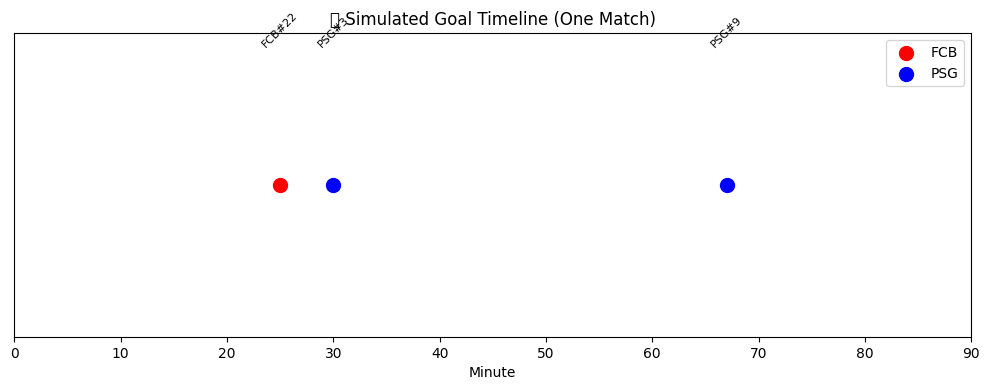

In [123]:
sample_match = simulate_match()
plot_match_timeline(sample_match)


In [98]:
def plot_score_distribution(scoreline_counts):
    top_scores = scoreline_counts.most_common(10)
    scores, freq = zip(*top_scores)

    plt.figure(figsize=(8, 4))
    plt.bar(scores, freq, color='purple')
    plt.title("📊 Top 10 Most Frequent Scorelines")
    plt.xlabel("Scoreline")
    plt.ylabel("Frequency")
    plt.grid(True, axis='y')
    plt.show()


In [99]:
def plot_top_scorers(all_events):
    df = pd.DataFrame(all_events)
    scorer_counts = df['scorer'].value_counts().head(10)

    plt.figure(figsize=(8, 5))
    scorer_counts.plot(kind='barh', color='green')
    plt.title("🎯 Top 10 Scorers in 1000 Simulated Matches")
    plt.xlabel("Goals")
    plt.gca().invert_yaxis()
    plt.grid(True, axis='x')
    plt.show()


In [100]:
all_events = []

for _ in range(1000):
    all_events.extend(simulate_match())


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


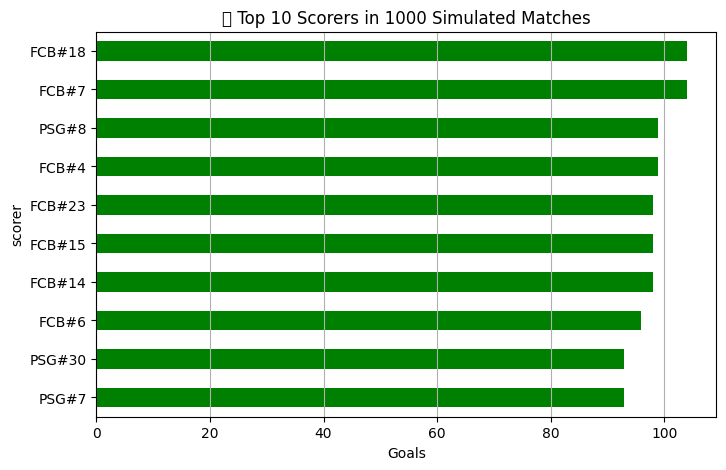

In [101]:
plot_top_scorers(all_events)


In [106]:
from collections import Counter

def extract_final_score(events):
    fcb_goals = sum(1 for e in events if e['team'] == 'FCB')
    psg_goals = sum(1 for e in events if e['team'] == 'PSG')
    return (fcb_goals, psg_goals)

scorelines = Counter()

for _ in range(1000):
    match = simulate_match()
    score = extract_final_score(match)
    scorelines[score] += 1


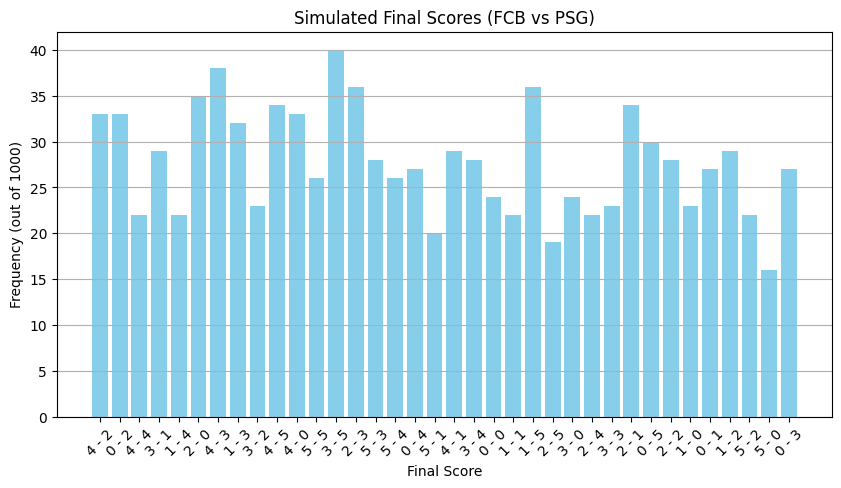

In [115]:
import matplotlib.pyplot as plt

labels = [f"{k[0]} - {k[1]}" for k in scorelines.keys()]
values = list(scorelines.values())

plt.figure(figsize=(10, 5))
plt.bar(labels, values, color='skyblue')
plt.title("Simulated Final Scores (FCB vs PSG)")
plt.xlabel("Final Score")
plt.ylabel("Frequency (out of 1000)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [116]:
fcb_win = sum(v for (f, p), v in scorelines.items() if f > p)
psg_win = sum(v for (f, p), v in scorelines.items() if p > f)
draw = sum(v for (f, p), v in scorelines.items() if f == p)

print(f"FCB Win %: {fcb_win / 10:.1f}%")
print(f"PSG Win %: {psg_win / 10:.1f}%")


FCB Win %: 41.3%
PSG Win %: 44.2%
